In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model
# Importing the dataset from the url of the data set
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
df = pd.read_csv("D:/Northeastern/ALY 6080/RawDanfossData.csv")
df.dtypes
df.describe()


,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total construction Index","EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic"
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,134.000000,173.000000,173.000000,...,171.000000,171.000000,139.000000,138.000000,134.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2014.878613,6.456647,51.725141,100.165468,99.911169,99.955067,108.435237,100.267461,99.799266,99.665680,...,99.110029,99.998665,99.514440,100.782788,100.995202,104.581690,105.038129,102.127317,102.876076,107.216767
std,4.186392,3.429459,11.779169,2.055684,1.853292,1.466436,41.132747,1.088957,3.153513,8.265685,...,4.844012,6.651863,7.532978,8.088812,2.515453,22.335711,33.182226,20.095164,19.591777,41.531314
min,2008.000000,1.000000,20.127824,95.690428,95.194252,93.944354,40.647561,97.362329,86.281709,78.049565,...,81.492718,80.244924,73.384132,75.120385,96.432692,52.173913,38.325282,49.435347,48.908297,25.925129
25%,2011.000000,4.000000,45.223723,98.867598,98.779094,99.273158,82.027291,99.468618,99.126682,95.629424,...,95.921830,97.915707,98.053737,98.570519,98.705175,91.913967,89.015152,93.725156,93.814882,85.104796
50%,2015.000000,6.000000,51.405531,100.024729,99.920269,99.928411,106.501051,100.404376,100.190961,99.665775,...,99.268112,100.968188,100.863572,102.100331,101.116503,99.567100,102.601156,100.911002,102.091634,98.219788
75%,2018.000000,9.000000,57.453146,101.027189,100.937885,100.774643,125.504250,101.285165,100.676776,103.551278,...,102.015713,102.973053,103.007853,105.431430,103.456907,119.743590,116.931156,107.602311,113.114878,123.806617
max,2022.000000,12.000000,81.893651,106.939196,105.027933,103.489160,254.561356,101.608496,110.900657,123.970038,...,123.641102,124.529812,113.718002,114.601585,105.760494,167.452077,236.158192,156.682028,175.103734,266.117065


In [94]:
col_replacing_missing_value = ['EMEA, VDMA Agriculture','EMEA, VDMA Construction',
                               'EMEA, VDMA Machine Building',
                               'EMEA, VDMA Material Handling',
                               'EMEA, VDMA Oil Hydraulic',
                               'EMEA, Production in total manufacturing Index',
                               'EMEA, Production of total construction Index',
                               'EMEA, Production of total industry Index',
                              'EMEA, Production of total manufactured intermediate goods Index',
                              'EMEA, Residential Property Sales of Newly Built Dwelings',
                              'EMEA, Production of total manufactured investment goods Index',
                              'EMEA, Consumer Confidence Indicator (CCI)',
                              'EMEA, Crude oil prices']
for col in col_replacing_missing_value:
    df[col] = df[col].replace(np.nan,df[col].mean())


In [95]:
df['EMEA, Employment Rate'] = df['EMEA, Employment Rate'].replace(np.nan, df['EMEA, Employment Rate'].median())


In [96]:
df.isnull().sum()

Year                                                               0
Month                                                              0
TARGET VARIABLE                                                    0
EMEA, Business Confidence Indicator (BCI)                          0
EMEA, CLI Normalized                                               0
EMEA, Consumer Confidence Indicator (CCI)                          0
EMEA, Crude oil prices                                             0
EMEA, Employment Rate                                              0
EMEA, GDP Normalized                                               0
EMEA, Germany ifo Business Climate                                 0
EMEA, ifo Business Expectations                                    0
EMEA, ifo Business Situation                                       0
EMEA, PMI                                                          0
EMEA, Production in total manufacturing Index                      0
EMEA, Production of total construc

In [97]:
from datetime import datetime
#df.info() - to know data type of variables

cols = ['Month','Year']
df['Duration'] = pd.to_datetime(
    df[cols].apply(
        lambda v: '-'.join(v.values.astype(str)),axis=1)
)
df.head(5) 

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic",Duration
0,2008,3,56.470288,99.386446,99.557885,98.749106,168.633416,101.237421,101.316538,95.536268,...,102.760351,102.130085,105.519810,103.477218,152.230259,78.222050,101.729730,109.491247,99.525480,2008-03-01
1,2008,4,58.276205,99.252286,99.302441,98.489578,170.615133,101.084697,101.189693,95.020105,...,103.044570,102.162637,105.808424,103.040339,147.498287,79.617964,108.737317,130.367913,96.626406,2008-04-01
2,2008,5,56.868989,99.107791,99.027786,98.153161,182.792208,100.932420,101.021160,95.629424,...,101.939318,100.863572,104.296346,102.608352,139.180835,74.803818,102.905501,109.939324,87.821297,2008-05-01
3,2008,6,56.320007,98.953695,98.723806,97.763344,190.765916,100.780587,100.801964,94.756323,...,101.186758,99.971225,103.435500,102.181175,137.021093,74.743418,102.995057,102.128778,88.591610,2008-06-01
4,2008,7,52.344385,98.797412,98.384961,97.426953,191.471205,100.645817,100.524887,93.881988,...,99.193298,98.533633,100.565160,101.651005,126.194468,66.202091,91.503987,85.019864,79.475532,2008-07-01


In [98]:
df.columns

Index(['Year', 'Month', 'TARGET VARIABLE',
       'EMEA, Business Confidence Indicator (BCI)', 'EMEA, CLI Normalized',
       'EMEA, Consumer Confidence Indicator (CCI)', 'EMEA, Crude oil prices',
       'EMEA, Employment Rate', 'EMEA, GDP Normalized',
       'EMEA, Germany ifo Business Climate', 'EMEA, ifo Business Expectations',
       'EMEA, ifo Business Situation', 'EMEA, PMI',
       'EMEA, Production in total manufacturing Index',
       'EMEA, Production of total construction Index',
       'EMEA, Production of total industry Index',
       'EMEA, Production of total manufactured intermediate goods Index',
       'EMEA, Production of total manufactured investment goods Index',
       'EMEA, Residential Property Sales of Newly Built Dwelings',
       'EMEA, VDMA Agriculture', 'EMEA, VDMA Construction',
       'EMEA, VDMA Machine Building', 'EMEA, VDMA Material Handling',
       'EMEA, VDMA Oil Hydraulic', 'Duration'],
      dtype='object')

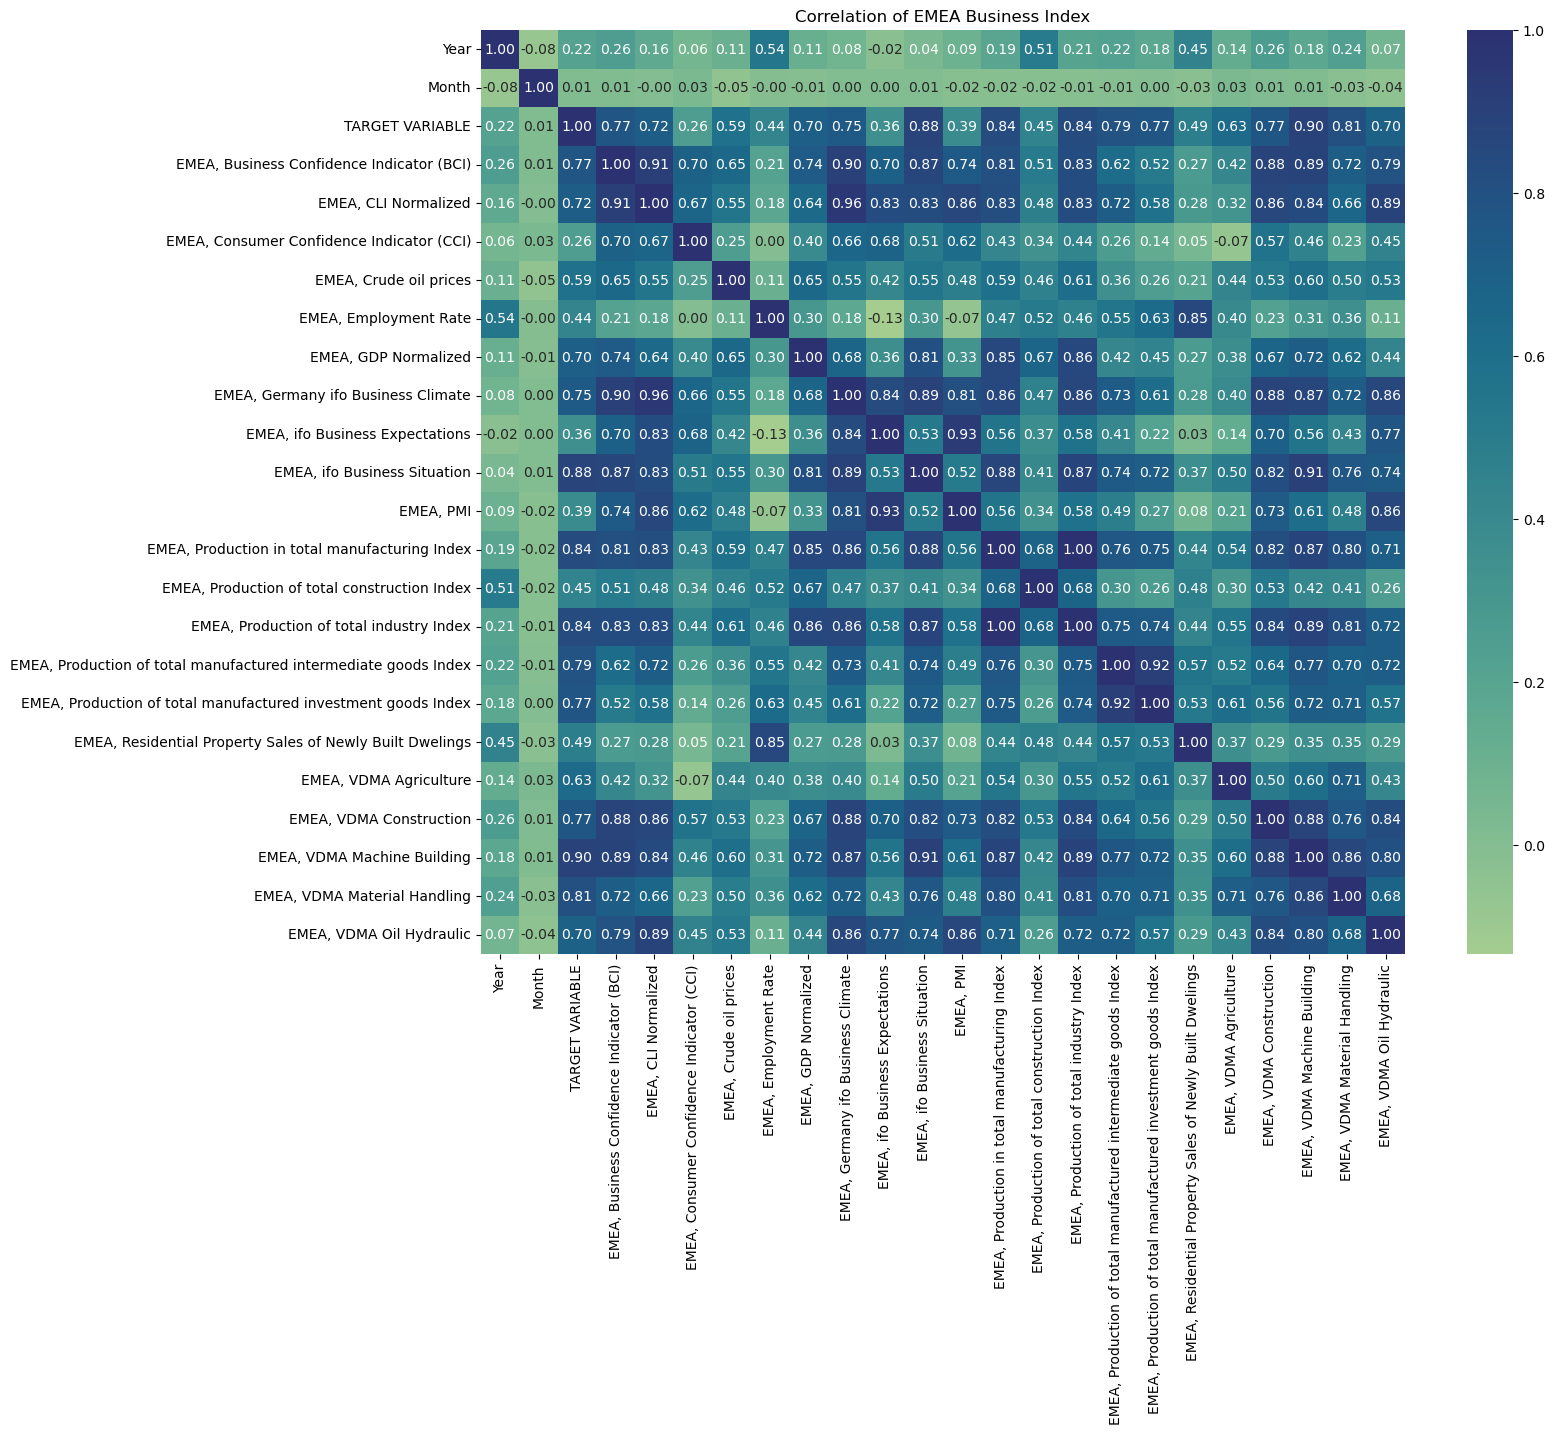

In [99]:
plt.figure(figsize=(16,12))
plt.title('Correlation of EMEA Business Index')
ax = sns.heatmap(df.corr(), square=True,  fmt='.2f', annot=True, linecolor='white',cmap="crest")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

In [100]:
df.columns

Index(['Year', 'Month', 'TARGET VARIABLE',
       'EMEA, Business Confidence Indicator (BCI)', 'EMEA, CLI Normalized',
       'EMEA, Consumer Confidence Indicator (CCI)', 'EMEA, Crude oil prices',
       'EMEA, Employment Rate', 'EMEA, GDP Normalized',
       'EMEA, Germany ifo Business Climate', 'EMEA, ifo Business Expectations',
       'EMEA, ifo Business Situation', 'EMEA, PMI',
       'EMEA, Production in total manufacturing Index',
       'EMEA, Production of total construction Index',
       'EMEA, Production of total industry Index',
       'EMEA, Production of total manufactured intermediate goods Index',
       'EMEA, Production of total manufactured investment goods Index',
       'EMEA, Residential Property Sales of Newly Built Dwelings',
       'EMEA, VDMA Agriculture', 'EMEA, VDMA Construction',
       'EMEA, VDMA Machine Building', 'EMEA, VDMA Material Handling',
       'EMEA, VDMA Oil Hydraulic', 'Duration'],
      dtype='object')

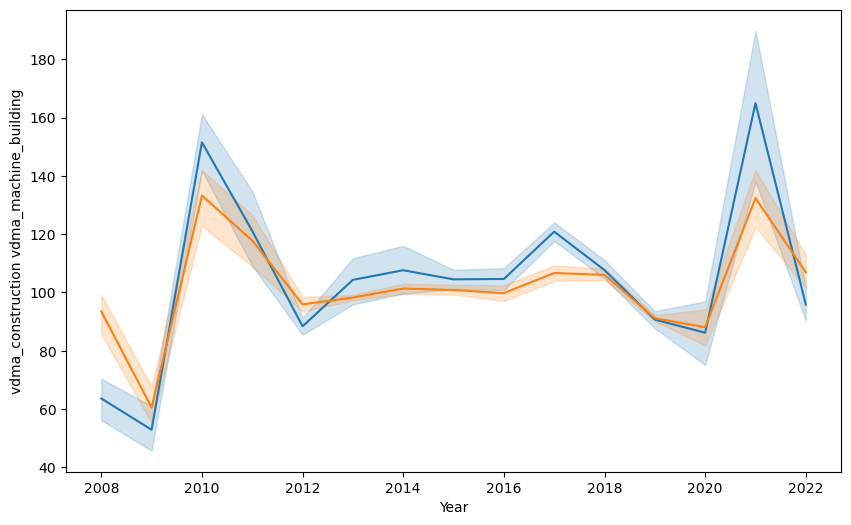

In [101]:
sns.lineplot(x="Year", y="EMEA, VDMA Construction", data=df)
sns.lineplot(x="Year", y='EMEA, VDMA Machine Building', data=df)

plt.ylabel("vdma_construction vdma_machine_building")
    
plt.show()

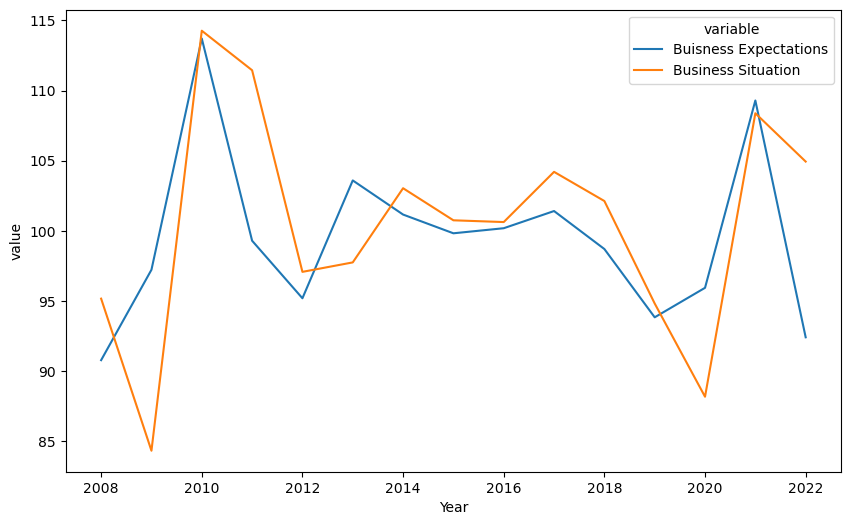

In [102]:
data_preproc = pd.DataFrame({
    'Year':df['Year'],
    'Buisness Expectations':df['EMEA, ifo Business Expectations'],
    'Business Situation':df['EMEA, ifo Business Situation']
})
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']),ci=None)
plt.savefig("Buisness Expectations vs Buisness Situation")

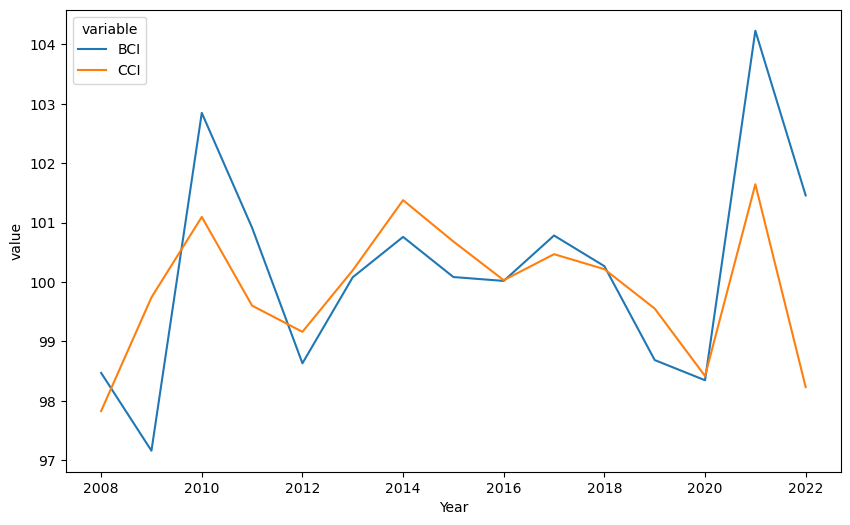

In [103]:
data_preproc = pd.DataFrame({
    'Year':df['Year'],
    'BCI':df['EMEA, Business Confidence Indicator (BCI)'],
    'CCI':df['EMEA, Consumer Confidence Indicator (CCI)']
})
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']),ci=None)
plt.savefig("BCI vs CCI")

In [104]:
df.columns

Index(['Year', 'Month', 'TARGET VARIABLE',
       'EMEA, Business Confidence Indicator (BCI)', 'EMEA, CLI Normalized',
       'EMEA, Consumer Confidence Indicator (CCI)', 'EMEA, Crude oil prices',
       'EMEA, Employment Rate', 'EMEA, GDP Normalized',
       'EMEA, Germany ifo Business Climate', 'EMEA, ifo Business Expectations',
       'EMEA, ifo Business Situation', 'EMEA, PMI',
       'EMEA, Production in total manufacturing Index',
       'EMEA, Production of total construction Index',
       'EMEA, Production of total industry Index',
       'EMEA, Production of total manufactured intermediate goods Index',
       'EMEA, Production of total manufactured investment goods Index',
       'EMEA, Residential Property Sales of Newly Built Dwelings',
       'EMEA, VDMA Agriculture', 'EMEA, VDMA Construction',
       'EMEA, VDMA Machine Building', 'EMEA, VDMA Material Handling',
       'EMEA, VDMA Oil Hydraulic', 'Duration'],
      dtype='object')

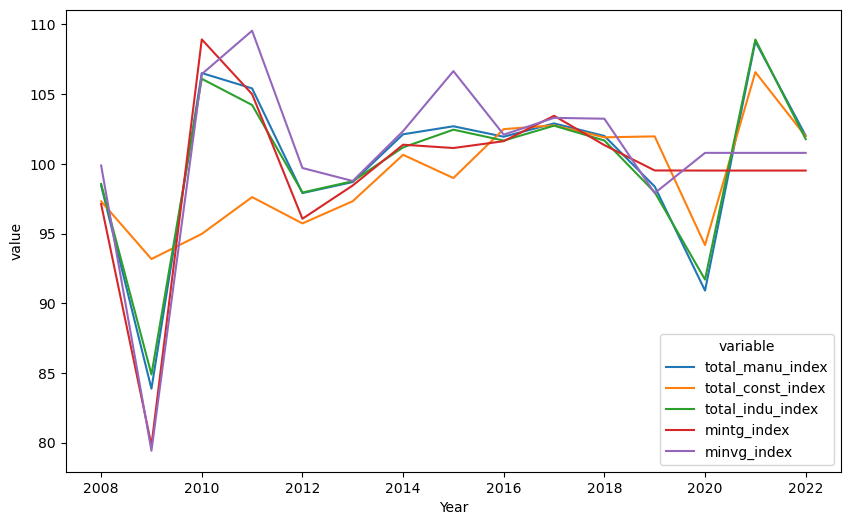

In [105]:
data_preproc = pd.DataFrame({
    'Year':df['Year'],
    'total_manu_index':df['EMEA, Production in total manufacturing Index'],
    'total_const_index':df['EMEA, Production of total construction Index'],
    'total_indu_index':df['EMEA, Production of total industry Index'],
    'mintg_index':df['EMEA, Production of total manufactured intermediate goods Index'],
    'minvg_index':df['EMEA, Production of total manufactured investment goods Index']
})
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']),ci=None)
plt.savefig("group")

In [106]:
df.columns

Index(['Year', 'Month', 'TARGET VARIABLE',
       'EMEA, Business Confidence Indicator (BCI)', 'EMEA, CLI Normalized',
       'EMEA, Consumer Confidence Indicator (CCI)', 'EMEA, Crude oil prices',
       'EMEA, Employment Rate', 'EMEA, GDP Normalized',
       'EMEA, Germany ifo Business Climate', 'EMEA, ifo Business Expectations',
       'EMEA, ifo Business Situation', 'EMEA, PMI',
       'EMEA, Production in total manufacturing Index',
       'EMEA, Production of total construction Index',
       'EMEA, Production of total industry Index',
       'EMEA, Production of total manufactured intermediate goods Index',
       'EMEA, Production of total manufactured investment goods Index',
       'EMEA, Residential Property Sales of Newly Built Dwelings',
       'EMEA, VDMA Agriculture', 'EMEA, VDMA Construction',
       'EMEA, VDMA Machine Building', 'EMEA, VDMA Material Handling',
       'EMEA, VDMA Oil Hydraulic', 'Duration'],
      dtype='object')

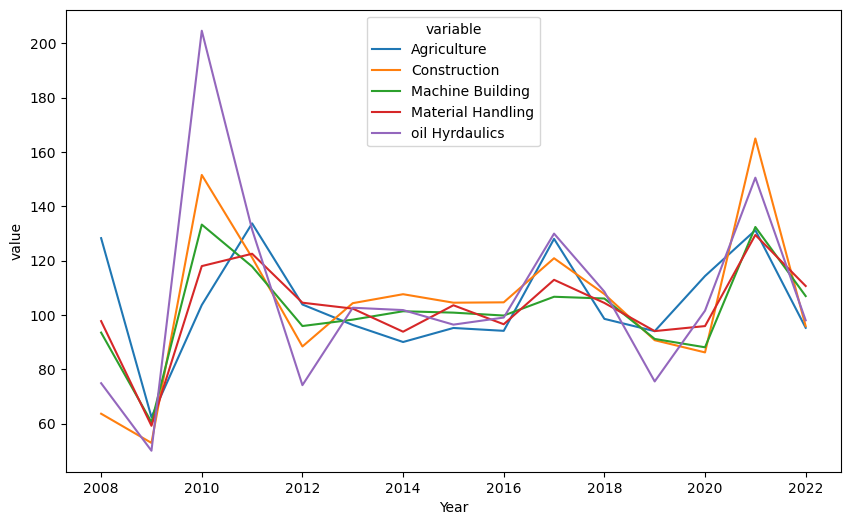

In [107]:
data_preproc = pd.DataFrame({
    'Year':df['Year'],
    'Agriculture':df['EMEA, VDMA Agriculture'],
    'Construction':df['EMEA, VDMA Construction'],
    'Machine Building':df['EMEA, VDMA Machine Building'],
    'Material Handling':df['EMEA, VDMA Material Handling'],
    'oil Hyrdaulics':df['EMEA, VDMA Oil Hydraulic']
})
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']),ci=None)
plt.savefig("group")

In [108]:
X = df[['Year', 'Month',
       'EMEA, Business Confidence Indicator (BCI)', 'EMEA, CLI Normalized',
       'EMEA, Consumer Confidence Indicator (CCI)', 'EMEA, Crude oil prices',
       'EMEA, Employment Rate', 'EMEA, GDP Normalized',
       'EMEA, Germany ifo Business Climate', 'EMEA, ifo Business Expectations',
       'EMEA, ifo Business Situation', 'EMEA, PMI',
       'EMEA, Production in total manufacturing Index',
       'EMEA, Production of total construction Index',
       'EMEA, Production of total industry Index',
       'EMEA, Production of total manufactured intermediate goods Index',
       'EMEA, Production of total manufactured investment goods Index',
       'EMEA, Residential Property Sales of Newly Built Dwelings',
       'EMEA, VDMA Agriculture', 'EMEA, VDMA Construction',
       'EMEA, VDMA Machine Building', 'EMEA, VDMA Material Handling',
       'EMEA, VDMA Oil Hydraulic']] # Features
y = df['TARGET VARIABLE']

In [109]:
X.isnull().sum()

Year                                                               0
Month                                                              0
EMEA, Business Confidence Indicator (BCI)                          0
EMEA, CLI Normalized                                               0
EMEA, Consumer Confidence Indicator (CCI)                          0
EMEA, Crude oil prices                                             0
EMEA, Employment Rate                                              0
EMEA, GDP Normalized                                               0
EMEA, Germany ifo Business Climate                                 0
EMEA, ifo Business Expectations                                    0
EMEA, ifo Business Situation                                       0
EMEA, PMI                                                          0
EMEA, Production in total manufacturing Index                      0
EMEA, Production of total construction Index                       0
EMEA, Production of total industry

In [110]:
y.isnull().sum()

0

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.030)

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [113]:
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [115]:
gbr = GradientBoostingRegressor(**gbr_params)

In [116]:
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [117]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(y_test, gbr.predict(X_test_std)))
print("Model Accuracy of Gradient Boosting: %.3f" % gbr.score(X_test_std, y_test))
print("The Root mean squared error (RMSE) on test set of Gradient Boosting: {:.4f}".format(rmse))

Model Accuracy of Gradient Boosting: 0.908
The Root mean squared error (RMSE) on test set of Gradient Boosting: 2.3232


[9.98428113e-04 1.03390216e-03 2.21379672e-03 1.46237108e-04
 1.68814110e-03 3.66226013e-02 9.77764880e-03 3.81052787e-01
 2.49148727e-02 2.09869432e-03 3.39028772e-02 3.38612857e-04
 1.34547187e-01 8.03027175e-03 4.39683256e-02 7.25645099e-04
 1.16577360e-01 2.13038184e-02 6.89314004e-02 9.79198063e-04
 1.00826565e-01 5.57341976e-03 3.74820886e-03]


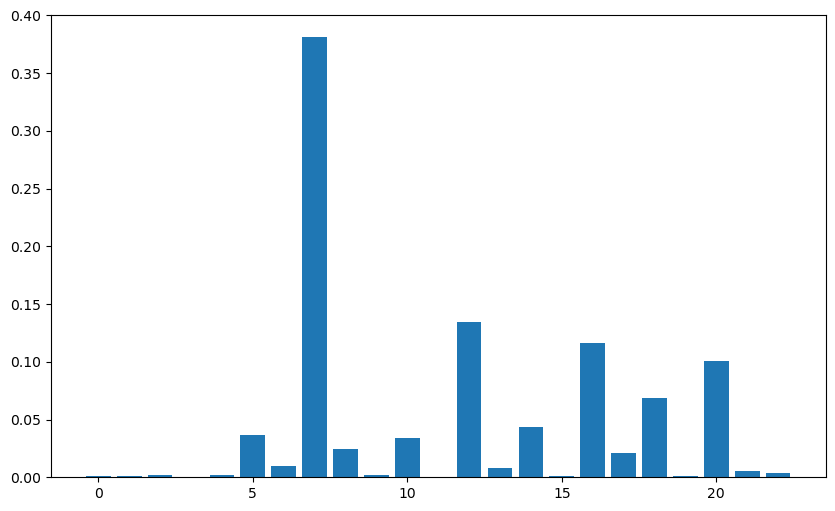

NameError: name 'sorted_idx' is not defined

In [118]:
from matplotlib import pyplot


print(gbr.feature_importances_)
# plot

pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
pyplot.show()
plt.yticks(X[sorted_idx])

In [119]:
features=[]
for columns in X.columns:
    features.append(columns)
    
imp_features = gbr.feature_importances_
for i in imp_features:
    print(i.round(3))
df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

0.001
0.001
0.002
0.0
0.002
0.037
0.01
0.381
0.025
0.002
0.034
0.0
0.135
0.008
0.044
0.001
0.117
0.021
0.069
0.001
0.101
0.006
0.004


,features,weights
7,"EMEA, GDP Normalized",0.381053
12,"EMEA, Production in total manufacturing Index",0.134547
16,"EMEA, Production of total manufactured investm...",0.116577
20,"EMEA, VDMA Machine Building",0.100827
18,"EMEA, VDMA Agriculture",0.068931
14,"EMEA, Production of total industry Index",0.043968
5,"EMEA, Crude oil prices",0.036623
10,"EMEA, ifo Business Situation",0.033903
8,"EMEA, Germany ifo Business Climate",0.024915
17,"EMEA, Residential Property Sales of Newly Buil...",0.021304


In [120]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train_std, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test_std)

print("Model Accuracy of XG Boost : %.3f" % xgb_r.score(X_test_std, y_test))
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[17:09:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Model Accuracy of XG Boost : 0.803
RMSE :  3.393701


In [121]:
features=[]
for columns in X.columns:
    features.append(columns)
    
imp_features = xgb_r.feature_importances_
for i in imp_features:
    print(i.round(3))
df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

0.0
0.001
0.002
0.0
0.001
0.011
0.024
0.218
0.004
0.007
0.119
0.0
0.271
0.011
0.0
0.0
0.174
0.008
0.001
0.002
0.138
0.0
0.007


,features,weights
12,"EMEA, Production in total manufacturing Index",0.271044
7,"EMEA, GDP Normalized",0.217704
16,"EMEA, Production of total manufactured investm...",0.173898
20,"EMEA, VDMA Machine Building",0.138343
10,"EMEA, ifo Business Situation",0.118884
6,"EMEA, Employment Rate",0.024019
13,"EMEA, Production of total construction Index",0.011382
5,"EMEA, Crude oil prices",0.011120
17,"EMEA, Residential Property Sales of Newly Buil...",0.007638
22,"EMEA, VDMA Oil Hydraulic",0.007445


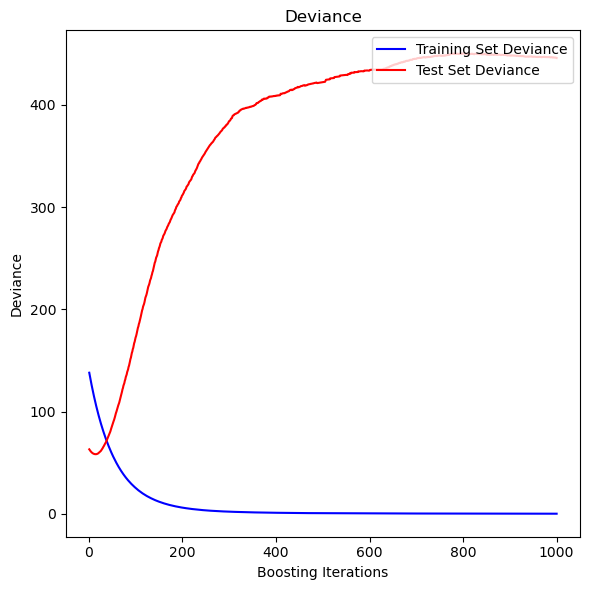

In [122]:
test_score = np.zeros((gbr_params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(gbr_params["n_estimators"]) + 1,
    gbr.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(gbr_params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [123]:
from datetime import datetime
#df.info() - to know data type of variables

cols = ['Month','Year']
df['Duration'] = pd.to_datetime(
    df[cols].apply(
        lambda v: '-'.join(v.values.astype(str)),axis=1)
)
df.head(5) 

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic",Duration
0,2008,3,56.470288,99.386446,99.557885,98.749106,168.633416,101.237421,101.316538,95.536268,...,102.760351,102.130085,105.519810,103.477218,152.230259,78.222050,101.729730,109.491247,99.525480,2008-03-01
1,2008,4,58.276205,99.252286,99.302441,98.489578,170.615133,101.084697,101.189693,95.020105,...,103.044570,102.162637,105.808424,103.040339,147.498287,79.617964,108.737317,130.367913,96.626406,2008-04-01
2,2008,5,56.868989,99.107791,99.027786,98.153161,182.792208,100.932420,101.021160,95.629424,...,101.939318,100.863572,104.296346,102.608352,139.180835,74.803818,102.905501,109.939324,87.821297,2008-05-01
3,2008,6,56.320007,98.953695,98.723806,97.763344,190.765916,100.780587,100.801964,94.756323,...,101.186758,99.971225,103.435500,102.181175,137.021093,74.743418,102.995057,102.128778,88.591610,2008-06-01
4,2008,7,52.344385,98.797412,98.384961,97.426953,191.471205,100.645817,100.524887,93.881988,...,99.193298,98.533633,100.565160,101.651005,126.194468,66.202091,91.503987,85.019864,79.475532,2008-07-01


In [124]:
df.set_index("Duration", inplace = True)

In [125]:
df1 = df.drop(['Year', 'Month','EMEA, Business Confidence Indicator (BCI)', 'EMEA, CLI Normalized',
       'EMEA, Consumer Confidence Indicator (CCI)', 'EMEA, Crude oil prices',
       'EMEA, Employment Rate', 'EMEA, GDP Normalized',
       'EMEA, Germany ifo Business Climate', 'EMEA, ifo Business Expectations',
       'EMEA, ifo Business Situation', 'EMEA, PMI',
       'EMEA, Production in total manufacturing Index',
       'EMEA, Production of total construction Index',
       'EMEA, Production of total industry Index',
       'EMEA, Production of total manufactured intermediate goods Index',
       'EMEA, Production of total manufactured investment goods Index',
       'EMEA, Residential Property Sales of Newly Built Dwelings',
       'EMEA, VDMA Agriculture', 'EMEA, VDMA Construction',
       'EMEA, VDMA Machine Building', 'EMEA, VDMA Material Handling',
       'EMEA, VDMA Oil Hydraulic'], axis=1)

In [126]:
df1.head(5)


,TARGET VARIABLE
Duration,
2008-03-01,56.470288
2008-04-01,58.276205
2008-05-01,56.868989
2008-06-01,56.320007
2008-07-01,52.344385


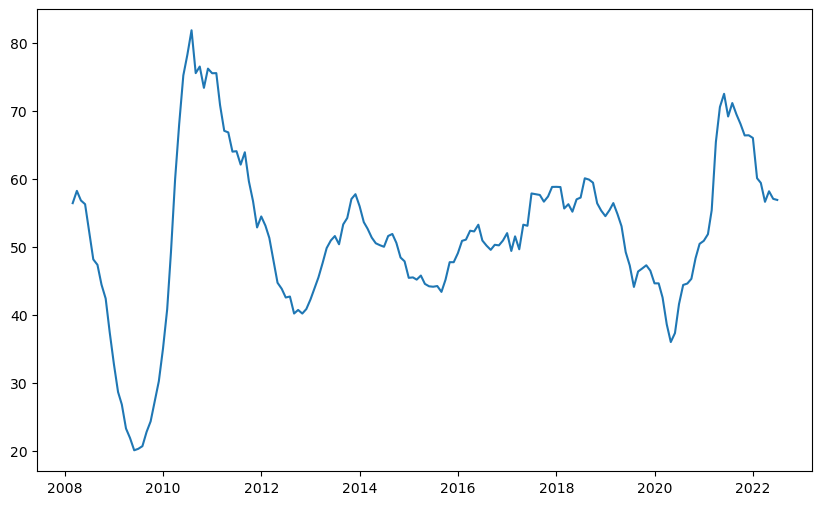

In [127]:
plt.rcParams.update({'figure.figsize' : (10,6)})
plt.plot(df1)

In [128]:
rolmean = df1.rolling(window=12).mean()
rolstd = df1.rolling (window=12).std()
print(rolmean,rolstd)

            TARGET VARIABLE
Duration                   
2008-03-01              NaN
2008-04-01              NaN
2008-05-01              NaN
2008-06-01              NaN
2008-07-01              NaN
...                     ...
2022-03-01        67.099259
2022-04-01        66.366079
2022-05-01        65.333407
2022-06-01        64.046153
2022-07-01        63.023457

[173 rows x 1 columns]             TARGET VARIABLE
Duration                   
2008-03-01              NaN
2008-04-01              NaN
2008-05-01              NaN
2008-06-01              NaN
2008-07-01              NaN
...                     ...
2022-03-01         4.065154
2022-04-01         5.058614
2022-05-01         5.368764
2022-06-01         5.333016
2022-07-01         5.427530

[173 rows x 1 columns]


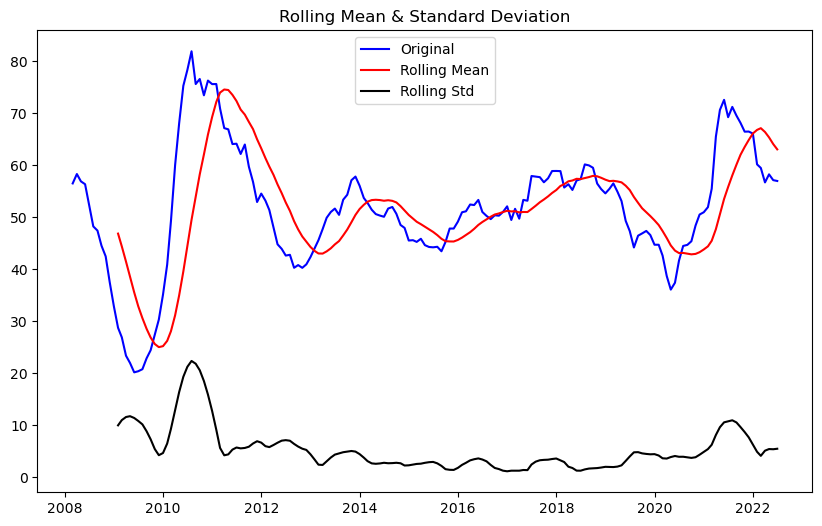

Results of Dickey-Fuller Test:
Test Statistic                  -4.127697
p-value                          0.000871
#Lags Used                      10.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64


In [129]:
from statsmodels.tsa.stattools import adfuller 


#Determing rolling statistics
movingAverage = df1.rolling(window=12).mean ()
movingSTD = df1.rolling(window=12).std()

#Plot rotling statistics:
orig = plt.plot(df1, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot (movingSTD, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print( 'Results of Dickey-Fuller Test:')
df1test = adfuller(df1['TARGET VARIABLE'], autolag='AIC')
df1output = pd.Series(df1test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df1test[4].items():
    df1output['Critical Value (%s)'%key] = value
print(df1output)

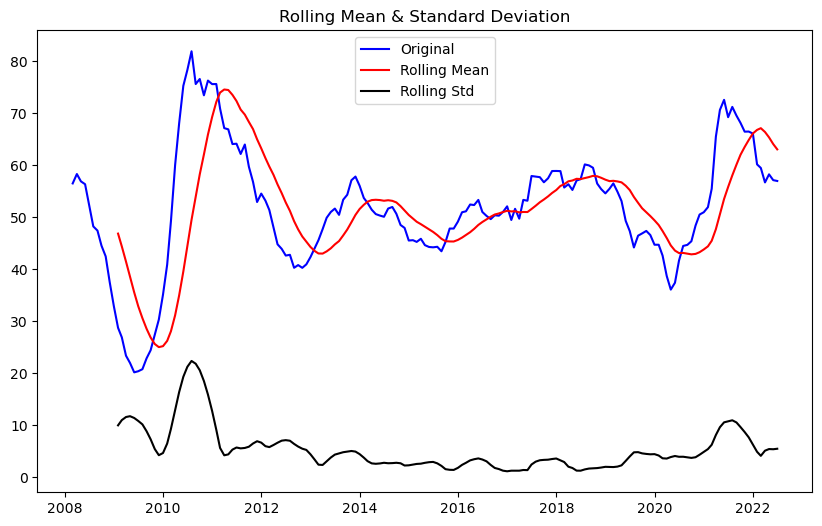

Results of Dickey-Fuller Test:
Test Statistic                  -4.127697
p-value                          0.000871
#Lags Used                      10.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64


In [130]:
df1.dropna(inplace=True)

#Determing rolling statistics
movingAverage = df1.rolling(window=12).mean ()
movingSTD = df1.rolling(window=12).std()

#Plot rotling statistics:
orig = plt.plot(df1, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot (movingSTD, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print( 'Results of Dickey-Fuller Test:')
df1test = adfuller(df1['TARGET VARIABLE'], autolag='AIC')
df1output = pd.Series(df1test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df1test[4].items():
    df1output['Critical Value (%s)'%key] = value
print(df1output)

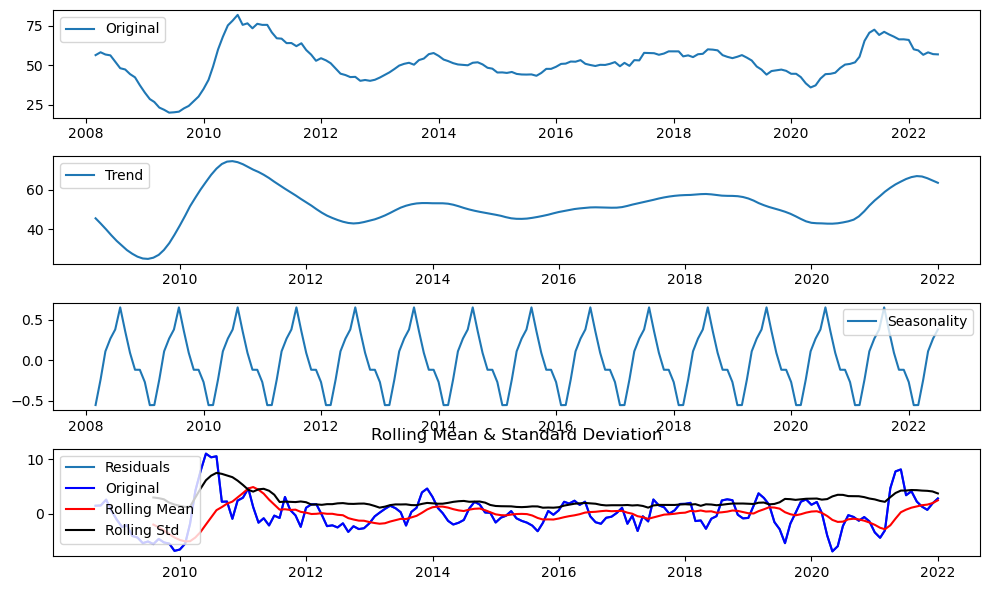

Results of Dickey-Fuller Test:
Test Statistic                  -5.490282
p-value                          0.000002
#Lags Used                       9.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot (df1['TARGET VARIABLE'], label='Original') 
plt.legend(loc='best') 

plt.subplot (412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 

plt.subplot (413) 
plt.plot(seasonal, label='Seasonality') 
plt.legend(loc='best') 

plt.subplot (414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

#Determing rolling statistics
movingAverage = decomposedLogData.rolling(window=12).mean()
movingSTD = decomposedLogData.rolling(window=12).std()

#Plot rotling statistics:
orig = plt.plot(decomposedLogData, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot (movingSTD, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print( 'Results of Dickey-Fuller Test:')
df1test = adfuller(decomposedLogData, autolag='AIC')
df1output = pd.Series(df1test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df1test[4].items():
    df1output['Critical Value (%s)'%key] = value
print(df1output)

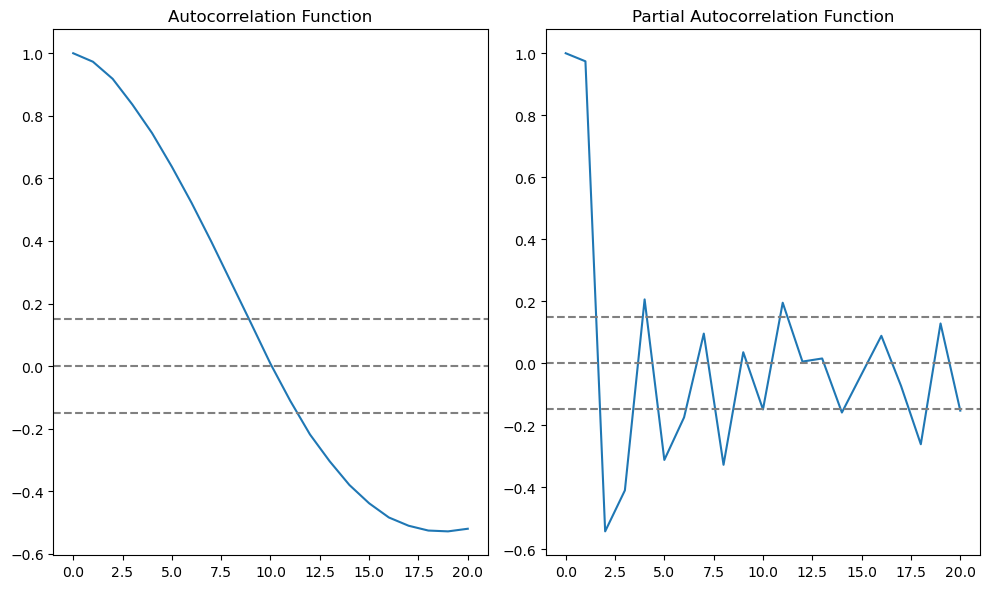

In [132]:
#ACF and_PAC plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df1, nlags=20)
lag_pacf = pacf(df1, nlags=20, method='ols')

#Plot ACF:
plt.subplot (121)
plt.plot (lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color = 'gray') 
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color = 'gray')
plt.title('Autocorrelation Function')

#PLot PACF:
plt.subplot (122)
plt.plot(lag_pacf)
plt.axhline(y = 0,linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(df)),linestyle='--', color = 'gray') 
plt.axhline(y = 1.96/np.sqrt(len(df)),linestyle='--',color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Plotting AR model


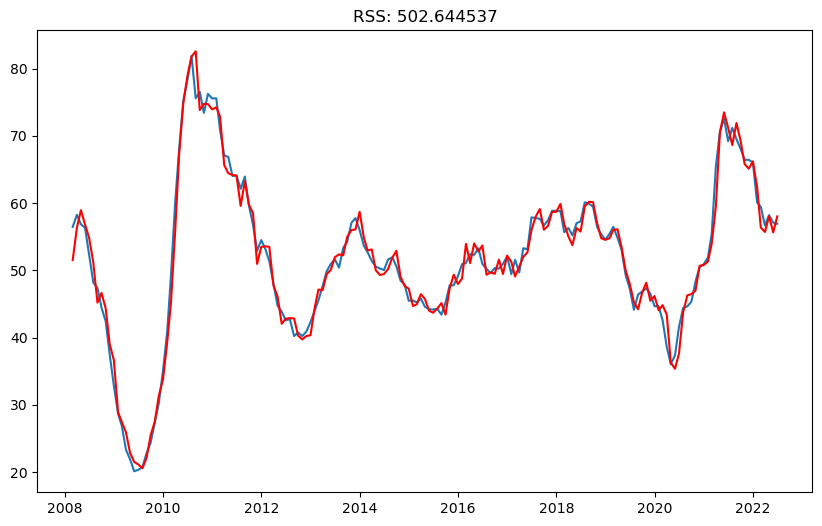

In [154]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#AR MODEL
model = sm.tsa.arima.ARIMA(df1, order = (10,0,3)) 
results_AR = model.fit()
plt.plot(df1)
plt.plot(results_AR.fittedvalues, color='red') 
plt.title('RSS: %4f' % sum((results_AR.fittedvalues-df['TARGET VARIABLE'])**2)) 
print('Plotting AR model')

In [155]:
pred_arima = pd.Series(results_AR.fittedvalues, copy=True)
print(pred_arima.head())

Duration
2008-03-01    51.533533
2008-04-01    56.336528
2008-05-01    58.957983
2008-06-01    56.795656
2008-07-01    54.855739
dtype: float64


In [156]:
pred_arima_cumsum = pred_arima.cumsum()
print(pred_arima_cumsum.head())

Duration
2008-03-01     51.533533
2008-04-01    107.870061
2008-05-01    166.828044
2008-06-01    223.623700
2008-07-01    278.479439
dtype: float64


In [157]:
predictions_ARIMA_log = pd.Series(df['TARGET VARIABLE'].iloc[0], index=df1.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(pred_arima_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Duration
2008-03-01    108.003821
2008-04-01    164.340349
2008-05-01    223.298333
2008-06-01    280.093988
2008-07-01    334.949728
dtype: float64

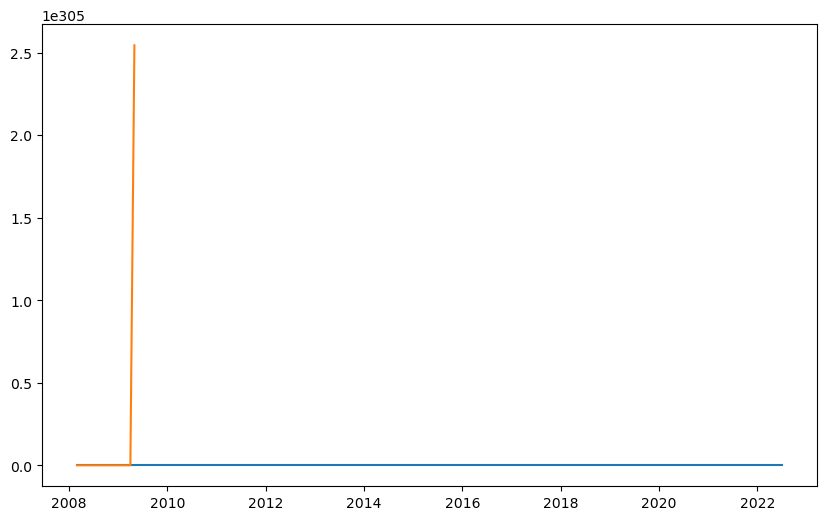

In [158]:
pred_arima_new = np.exp(predictions_ARIMA_log)
plt.plot(df1)
plt.plot(pred_arima_new)

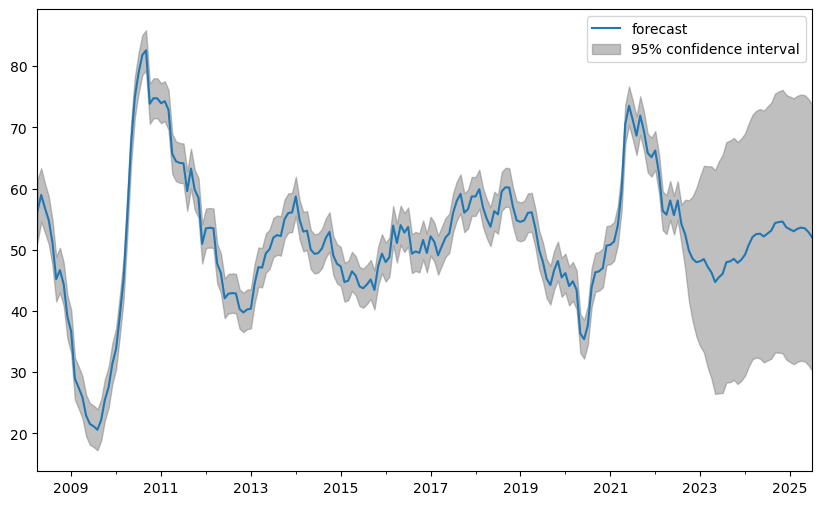

In [159]:
#results_AR.plot_predict(1,208)
#x = results_AR.forecast(steps=36)
from statsmodels.graphics.tsaplots import plot_predict
#fig, ax = plt.subplots()
#ax = i.loc['1950':].plot(ax=ax)
plot_predict(results_AR, 1,208)
plt.show()